In [1]:
from resources.notebook_library import *
from resources.gate_simulation.direct_ghz import ghz_simulation
from resources.gate_simulation.direct_ghz import gate_simulation_functions
GateSimulation  = ghz_simulation
sim = GateSimulation.Simulation(load=True)

Loading object O-O-x-O- 
Preparing Analytical sub-class

Done!


# Obtain grid(s) of performance

In [2]:
# Global Parameters 
kSweep = [0.99]   #[0.995]

CSweep =[25]#[25]#[25,50,75]#,50,75]

SplitSweep =[15]
 

# Bounds of optimization
## DE will be multiplied by  np.sqrt(C_val)/gamma_val
DE_min = 0.01 
DE_max = 10
tg_min = 0.7
tg_max = 1.2
rot_min = 0.8
rot_max = 1.2


# Optimization settings
opt_settings_dict = {
"ghz_dim":3,                # 3-ghz state or 4-ghz state
'swap_into_memory':False,    # Use of nuclear memory
'fidelity_cap': 0.95 , 'confidence_interval':0.99, #Cost function parameters
"n_cores": 16,  # Number of cores to use in optimization
"disp_bool" : True} # Show optimization progress

## Using analytical simulations

In [3]:
gamma_val = sim.parameters[sg.var('gamma')]

SplitSweep = [spl*gamma_val for spl in SplitSweep] # for gamma_val = 1 it is not necessary

AllParams = [(a,b,c) for a in kSweep for b in CSweep for c in SplitSweep] # Create a 3-d grid for hardware parameters

TotalParamElems = NumElemsInList(AllParams)


CurrentNumberOfSimulations = 1
Results = [ [{} for j in range(len(SplitSweep))] for i in range(len(CSweep))]
cont_bool = True
while cont_bool:
        for  (k, C_val , max_split) in AllParams:
                print(f'Optimizing {CurrentNumberOfSimulations} out of {TotalParamElems}')
                CurrentNumberOfSimulations +=1
                c_val = k/ (4-4*k)
                
                hardware_dict = {'c': c_val,'k':k , 'C':C_val ,'max_split': max_split}

                sim.Analytical.obtain_gate_performance_hardware(hardware_dict)
                bounds = [[0 , max_split] , [DE_min,DE_max*np.sqrt(C_val)/gamma_val ] , [tg_min,tg_max]  ]
                # Add rotation bounds depending on the ghz_dim
                #for i in range(opt_settings_dict["ghz_dim"]) : bounds.append([rot_min,rot_max]) 
                for i in range(2) : bounds.append([rot_min,rot_max]) 
                sim.Analytical.optimize_gate_performance_hardware(bounds,opt_settings_dict)
                
                optimized_performance_dict = sim.Analytical.optimized_performance_dict
                opt_cost_function = gate_simulation_functions.gate_performance_cost_function(optimized_performance_dict,opt_settings_dict)
                if opt_cost_function<0:
                        cont_bool = False
                tunable_params_dict = sim.Analytical.opt_tunable_dict
                
                result = {'hardware': hardware_dict , 
                        'performance': optimized_performance_dict,
                        'tuning': tunable_params_dict,
                        'opt_settings' : opt_settings_dict, 
                        'cost': opt_cost_function}
                i = np.where(C_val == np.array(CSweep) )[0][0]
                j = np.where(max_split == np.array(SplitSweep) )[0][0]
                Results[i][j] = result

                clear_output(wait=True)

Optimizing 1 out of 1
differential_evolution step 1: f(x)= 45.0003
differential_evolution step 2: f(x)= 45.0003
differential_evolution step 3: f(x)= 35.4351
differential_evolution step 4: f(x)= 35.4351
differential_evolution step 5: f(x)= 35.4351
differential_evolution step 6: f(x)= 35.4351
differential_evolution step 7: f(x)= 32.9488
differential_evolution step 8: f(x)= 32.9488
differential_evolution step 9: f(x)= 27.694
differential_evolution step 10: f(x)= 23.5896
differential_evolution step 11: f(x)= 23.5896
differential_evolution step 12: f(x)= 23.5896
differential_evolution step 13: f(x)= 21.5457
differential_evolution step 14: f(x)= 21.5457
differential_evolution step 15: f(x)= 21.5457
differential_evolution step 16: f(x)= 21.5457
differential_evolution step 17: f(x)= 21.3406
differential_evolution step 18: f(x)= 21.2851
differential_evolution step 19: f(x)= 21.2851
differential_evolution step 20: f(x)= 20.5362
differential_evolution step 21: f(x)= 20.5362
differential_evolution

TypeError: unable to simplify to float approximation

# Plot result

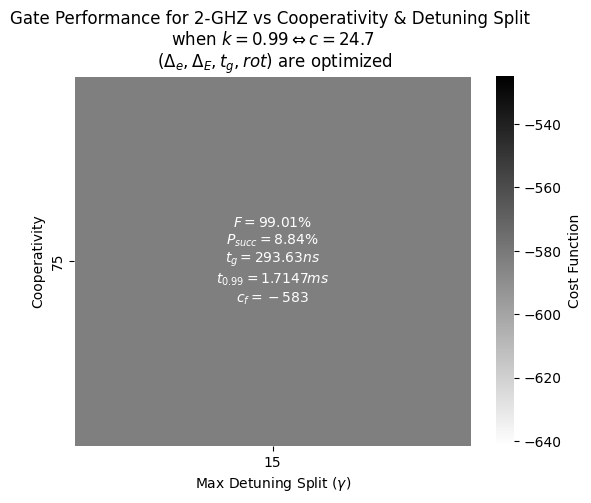

{'cost': -583.1986336751972,
 'hardware': {'C': 75, 'c': 24.74999999999998, 'k': 0.99, 'max_split': 15},
 'opt_settings': {'confidence_interval': 0.99,
                  'disp_bool': False,
                  'fidelity_cap': 0.99,
                  'ghz_dim': 2,
                  'n_cores': 16,
                  'swap_into_memory': False},
 'performance': {'concurrence': 0.9870436490717143,
                 'fidelity': 0.9900682697217602,
                 'gate_time': 8.808994662631642,
                 'p_success': 0.08837365729554231,
                 't_conf': 0.0017146816577710527},
 'tuning': {De: 1.4750446778031252,
            DE: 2.758860660042899,
            tgr: 0.9306699192792619,
            r0_r: 1.0275483354650845,
            r1_r: 1.0290190567539215,
            tgs: 8.808994662631642,
            pss: 0.08837365729554231}}


In [ ]:
plot_results(Results)
pprint(Results[0][0])

# Print results

In [ ]:
for i,C in enumerate(CSweep):
    for j,spl in enumerate(SplitSweep):
        pass
        #print(Results[i][j]['tuning'][sg.var('DE')]/np.sqrt(C))
        #print(Results[i][j]['tuning'][sg.var('De')],spl)
        #print([Results[i][j]['tuning'][sg.var(f'r{k}_r')]  for k in range(opt_settings_dict["ghz_dim"] ) ])
       

In [ ]:
costs = np.array([[Results[i][j]['cost'] for j in range(len(SplitSweep))]for i in range(len(CSweep))])
i_min, j_min = ArgMin(costs)

Results[i_min][j_min]

{'hardware': {'c': 24.74999999999998, 'k': 0.99, 'C': 75, 'max_split': 15},
 'performance': {'gate_time': 8.808994662631642,
  'p_success': 0.08837365729554231,
  'fidelity': 0.9900682697217602,
  't_conf': 0.0017146816577710527,
  'concurrence': 0.9870436490717143},
 'tuning': {De: 1.4750446778031252,
  DE: 2.758860660042899,
  tgr: 0.9306699192792619,
  r0_r: 1.0275483354650845,
  r1_r: 1.0290190567539215,
  tgs: 8.808994662631642,
  pss: 0.08837365729554231},
 'opt_settings': {'ghz_dim': 2,
  'swap_into_memory': False,
  'fidelity_cap': 0.99,
  'confidence_interval': 0.99,
  'n_cores': 16,
  'disp_bool': False},
 'cost': -583.1986336751972}

# Tests

In [ ]:
tunable_parameters_dict = {sg.var("De1"): 49.26073284392254
, sg.var("De2"): 25.285056530282482, 
sg.var("DE"): 0.9327664708604897, 
sg.var("tgr"): 0.9754512038222098, 
sg.var("r0_r"): 0.9754512038222098, 
sg.var("r1_r"): 1.1249785909114383, 
sg.var("tgs"): 8.42852756771169, 
sg.var("pss"): 0.0624942639192368}

In [ ]:
k = 0.999
HL_dict = {sg.var("C"):250,sg.var("c"):k/ (4-4*k),sg.var("max_split"):50}
for key in HL_dict:
    if type(HL_dict[key]) is type(sg.var('x')): HL_dict[key] = HL_dict[key].subs(tunable_parameters_dict)
HL_dict = { **HL_dict ,**tunable_parameters_dict }

gate_time = float(sg.real( sim.Analytical.gate_time_symbolic.subs( HL_dict )))
HL_dict[sg.var('tgs')] =  gate_time
tunable_parameters_dict[sg.var('tgs')] =  gate_time
p_success = float(sg.real(sim.Analytical.p_success_symbolic.subs(HL_dict)))

tunable_parameters_dict[sg.var('pss')]   = p_success
HL_dict[sg.var('pss')]   = p_success

fidelity = float(sg.real(sim.Analytical.fidelity_ghz_symbolic.subs( HL_dict)))

In [ ]:
fidelity

0.9999999979735865

In [ ]:
p_success

0.0624942639192368

In [ ]:
gate_time

8.42852756771169